In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.float_format = "{:.2f}".format

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns



In [2]:
df = pd.read_csv('../data/Nairobi_property_data.csv')

In [3]:
df.head()

,title,location,price,agent
0,Commercial Land,The Hub Karen,255000000,crystal-valuers-ltd
1,3 Bedroom Townhouse,Kiambu Road,35250000,ams-properties-limited
2,2 Bedroom Flat & Apartment,Kindaruma Road,6600000,premium-properties
3,4 Bedroom Flat & Apartment,Lavington,34000000,bright-homes-management
4,4 Bedroom Townhouse,Runda,27450000,palmier-properties-limited


In [4]:
df['price'] = df['price'].astype(float)

In [5]:
df.describe()

,price
count,3616.00
mean,65000134.14
std,183039942.28
min,0.00
25%,13000000.00
50%,23500000.00
75%,65000000.00
max,7500000000.00


In [6]:
# dropping duplicates if any in the dataset

df=df.drop_duplicates()


In [7]:
df.shape

(3363, 4)

In [8]:
# #cleaning
# df['title_clean'] = np.where((df['title'].str.contains('Land')),'Commercial Land',
#                        np.where((df['title'].str.contains('2 Bedroom Flat')),'2 Bedroom Flat & Apartment',
#                             np.where((df['title'].str.contains('3 Bedroom Flat')),'3 Bedroom Flat & Apartment',
#                                 np.where((df['title'].str.contains('4 Bedroom Flat')),'4 Bedroom Flat & Apartment',
#                                     np.where((df['title'].str.contains('3 Bedroom Flat')),'3 Bedroom Flat & Apartment',None))))


In [9]:
#aggregate per the property title and compute the mean , max , min and count per group
agg_title_df = df.groupby('title').agg({'price':['count','mean','max','min']})
agg_title_df.columns = ["_".join(x) for x in agg_title_df.columns.ravel()]
agg_title_df= agg_title_df.reset_index()

In [10]:
agg_title_df.head()

,title,price_count,price_mean,price_max,price_min
0,2 Bedroom Flat & Apartment,1,10150000.00,10150000.00,10150000.00
1,3 Bedroom Flat & Apartment,2,14500000.00,19500000.00,9500000.00
2,4 Bedroom Flat & Apartment,1,25000000.00,25000000.00,25000000.00
3,4 Bedroom House,1,35000000.00,35000000.00,35000000.00
4,Commercial Land,1,793000000.00,793000000.00,793000000.00


In [11]:
#sorting the properties in descending order
agg_title_df_sorted = agg_title_df.sort_values(by='price_count', ascending = False)

In [12]:
print(agg_title_df_sorted.shape)
agg_title_df_sorted.head()

(61, 5)


,title,price_count,price_mean,price_max,price_min
13,3 Bedroom Flat & Apartment,837,18664691.88,55000000.00,65000.00
8,2 Bedroom Flat & Apartment,435,14563152.10,675000000.00,0.00
21,4 Bedroom Flat & Apartment,274,29555620.43,245000000.00,0.00
54,Land,238,148214885.53,1500000000.00,0.00
33,5 Bedroom Townhouse,194,83136030.93,300000000.00,28000000.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

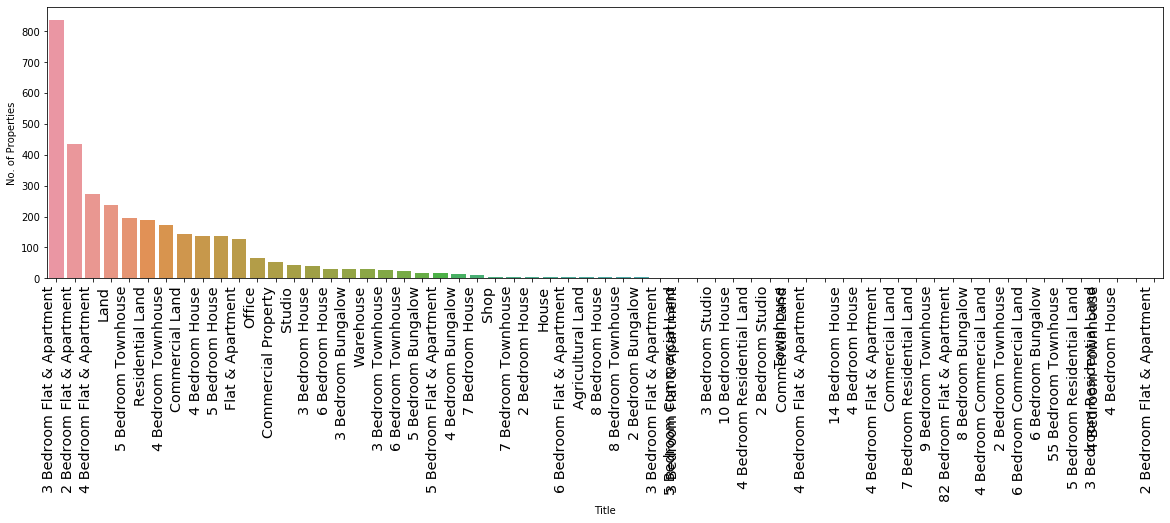

In [13]:
plt.figure(figsize=(20,5))
#sns.set(style="whitegrid")
ax = sns.barplot(x="title", y="price_count", data=agg_title_df_sorted)
ax.set(xlabel='Title', ylabel='No. of Properties')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [14]:
#aggregate per the property title and compute the mean , max , min and count per group
agg_agent_df = df.groupby('agent').agg({'price':['count','mean','max','min']})
agg_agent_df.columns = ["_".join(x) for x in agg_agent_df.columns.ravel()]
agg_agent_df= agg_agent_df.reset_index()

In [15]:
#sorting the properties in descending order
agg_agent_df_sorted = agg_agent_df.sort_values(by='price_count', ascending = False)

In [16]:
print(agg_agent_df_sorted.shape)
agg_agent_df_sorted.head()

(208, 5)


,agent,price_count,price_mean,price_max,price_min
125,pam-golding-properties,261,90797642.15,1600000000.00,0.00
126,paradigm-homes,121,32540052.27,390000000.00,3600000.00
39,coralinternational-ltd,95,62820921.05,450000000.00,0.00
67,gna-real-estate,90,24717222.22,180000000.00,2500000.00
6,affordable-apartments-kenya,88,35063636.36,130000000.00,3600000.00


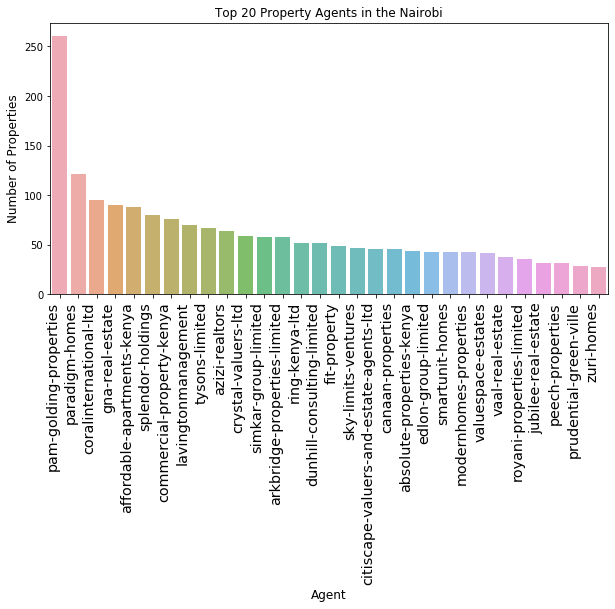

In [17]:
#plot the first 20 agents

# in the column 'City'
agent_count  = df['agent'].value_counts()
agent_count = agent_count[:30,]
plt.figure(figsize=(10,5))
sns.barplot(agent_count.index, agent_count.values, alpha=0.8)
plt.title('Top 20 Property Agents in the Nairobi')
plt.ylabel('Number of Properties', fontsize=12)
plt.xlabel('Agent', fontsize=12)


plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

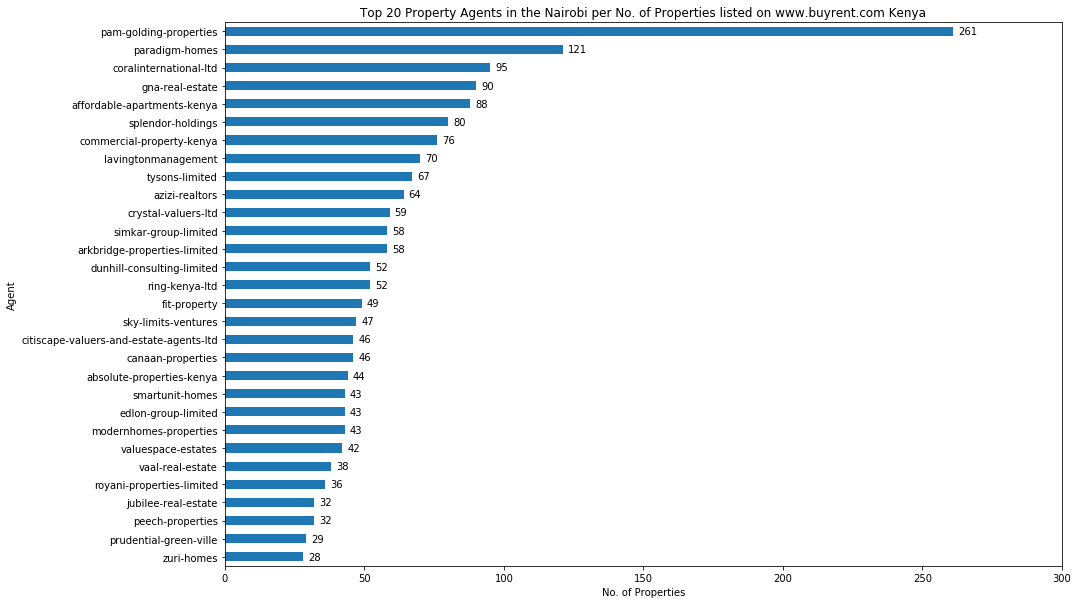

In [18]:
agent_ = agg_agent_df_sorted.head(30)

# Bring some raw data.
frequencies = agent_['price_count']

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
#freq_series = pd.Series.from_array(frequencies)

y_labels = agent_['agent']

# Plot the figure.
plt.figure(figsize=(15, 10))
ax = frequencies.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 20 Property Agents in the Nairobi per No. of Properties listed on www.buyrent.com Kenya')
ax.set_xlabel('No. of Properties')
ax.set_ylabel('Agent')
ax.set_yticklabels(y_labels)
ax.set_xlim(0, 300) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
      # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("agents_in_nairobi.png")